In [1]:
from simply import redshift, simple_colors
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

## Contact for All Clients (12/19-12/23)

In [2]:
contact_df = redshift("""contact_query.sql""")

In [29]:
android_web_contact_df = redshift("""android_web_contact_query.sql""")

In [3]:
contact_df.head()

,user_ref,test_group,num_cases,num_calls,phone_new_card,num_chats,num_messages,chat_new_card,messages_new_card
0,73b16ccc-1d7f-45ab-b5bc-2111c5c4d82b,TEST,0,0,0,0,0,0,0
1,980a3abb-6a8a-470a-af87-30d6d4a52b17,CONTROL,1,0,0,0,1,0,0
2,a8e65826-9634-4500-a386-049f96c61cbd,CONTROL,0,0,0,0,0,0,0
3,a0a04c7c-6d6d-4600-95f6-91f5e6852a20,TEST,0,0,0,0,0,0,0
4,9972e9f8-5274-414e-afef-c67f3e4936df,CONTROL,0,0,0,0,0,0,0


In [4]:
contact_df[contact_df.test_group == 'TEST'].user_ref.count()

68374

In [6]:
contact_df[contact_df.test_group == 'CONTROL'].user_ref.count()

68328

In [23]:
android_web_contact_df[android_web_contact_df.test_group == 'TEST'].user_ref.count()

40303

In [24]:
android_web_contact_df[android_web_contact_df.test_group == 'CONTROL'].user_ref.count()

40190

In [7]:
contact_df.describe()

,num_cases,num_calls,phone_new_card,num_chats,num_messages,chat_new_card,messages_new_card
count,136702.000000,136702.000000,136702.000000,136702.000000,136702.000000,136702.000000,136702.000000
mean,0.010358,0.001829,0.000358,0.000088,0.008442,0.000007,0.001902
std,0.132428,0.048348,0.019312,0.010120,0.114182,0.002705,0.054599
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,3.000000,2.000000,2.000000,10.000000,1.000000,10.000000


In [32]:
sum(android_web_contact_df.messages_new_card)

266

In [8]:
sum(contact_df[contact_df.test_group == 'TEST'].messages_new_card)

125

In [9]:
sum(contact_df[contact_df.test_group == 'CONTROL'].messages_new_card)

135

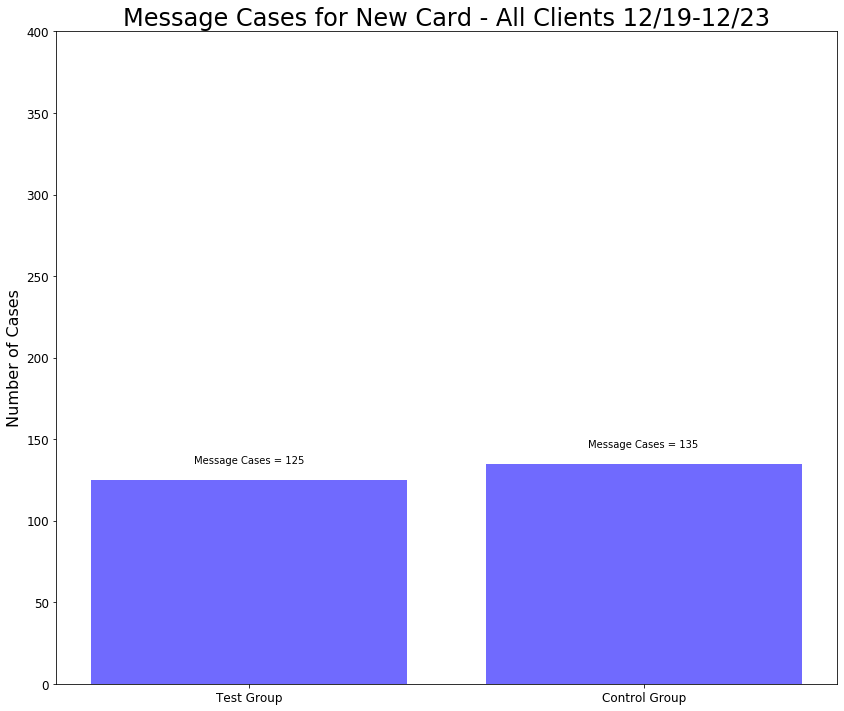

In [21]:
fig, ax = plt.subplots(figsize=(14,12))

x = [0,1]
y = [sum(contact_df[contact_df.test_group == 'TEST'].messages_new_card),sum(contact_df[contact_df.test_group == 'CONTROL'].messages_new_card)]

labels = ['Test Group','Control Group']

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0,400)

i = 0 #index for the first value we want

for label in labels:
    labels[i]
    ax.annotate('Message Cases = {}'.format(y[i]), # first argument is the text you want to show on the figure
                xy=(x[i],y[i]),
                xytext=(x[i]-0.14,y[i]+10)
               )
    i = i + 1
plt.title('Message Cases for New Card - All Clients 12/19-12/23', fontsize = 24)
plt.ylabel('Number of Cases', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
bar_plot = plt.bar(x,y,color = '#706AFE')

In [26]:
sum(android_web_contact_df[android_web_contact_df.test_group == 'TEST'].messages_new_card)

0

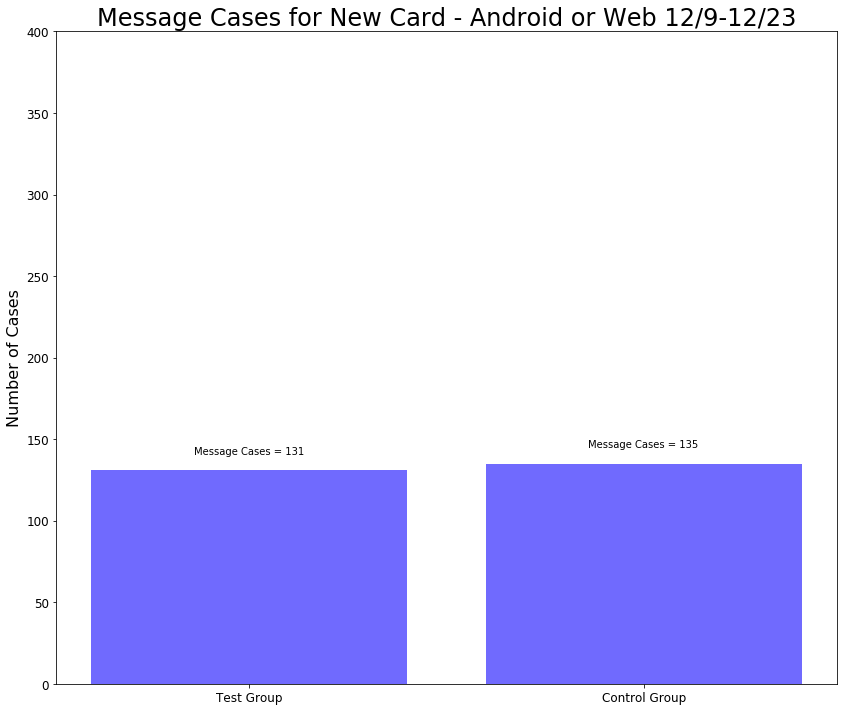

In [31]:
fig, ax = plt.subplots(figsize=(14,12))

x = [0,1]
y = [sum(android_web_contact_df[android_web_contact_df.test_group == 'TEST'].messages_new_card),sum(android_web_contact_df[android_web_contact_df.test_group == 'CONTROL'].messages_new_card)]

labels = ['Test Group','Control Group']

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0,400)

i = 0 #index for the first value we want

for label in labels:
    labels[i]
    ax.annotate('Message Cases = {}'.format(y[i]), # first argument is the text you want to show on the figure
                xy=(x[i],y[i]),
                xytext=(x[i]-0.14,y[i]+10)
               )
    i = i + 1
plt.title('Message Cases for New Card - Android or Web 12/9-12/23', fontsize = 24)
plt.ylabel('Number of Cases', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
bar_plot = plt.bar(x,y,color = '#706AFE')

In [11]:
x = [0,1]
y = [sum(contact_df[contact_df.test_group == 'TEST'].messages_new_card),sum(contact_df[contact_df.test_group == 'CONTROL'].messages_new_card)]

# test = '{}'.format(y)
# print(test)h

i = 0 #index for the first value we want

for label in labels:
    labels[i]
    ax.annotate('{}'.format(y[i]), # first argument is the text you want to show on the figure
                xy=(x[i],y[i]),
                xytext=(x[i],y[i]+20),
               )
    i = i + 1


In [12]:
i = 0
labels[i]
labels[i+1]
print(i)

0


In [13]:
# help(ax.annotate)
# help(plt.subplots)
# help(plt.title)

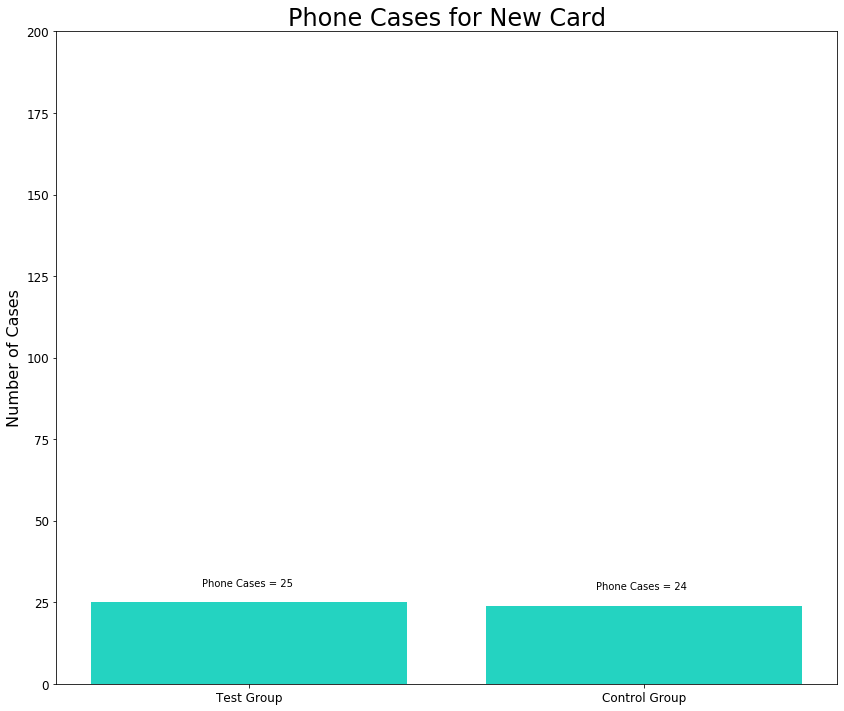

In [14]:
fig, ax = plt.subplots(figsize=(14,12))

x = [0,1]
y = [sum(contact_df[contact_df.test_group == 'TEST'].phone_new_card),sum(contact_df[contact_df.test_group == 'CONTROL'].phone_new_card)]

labels = ['Test Group','Control Group']

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0,200)

i = 0 #index for the first value we want

for label in labels:
    labels[i]
    ax.annotate('Phone Cases = {}'.format(y[i]), # first argument is the text you want to show on the figure
                xy=(x[i],y[i]),
                xytext=(x[i]-0.12,y[i]+5)
               )
    i = i + 1
plt.title('Phone Cases for New Card', fontsize = 24)
plt.ylabel('Number of Cases', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
bar_plot = plt.bar(x,y,color = '#24D3C1')

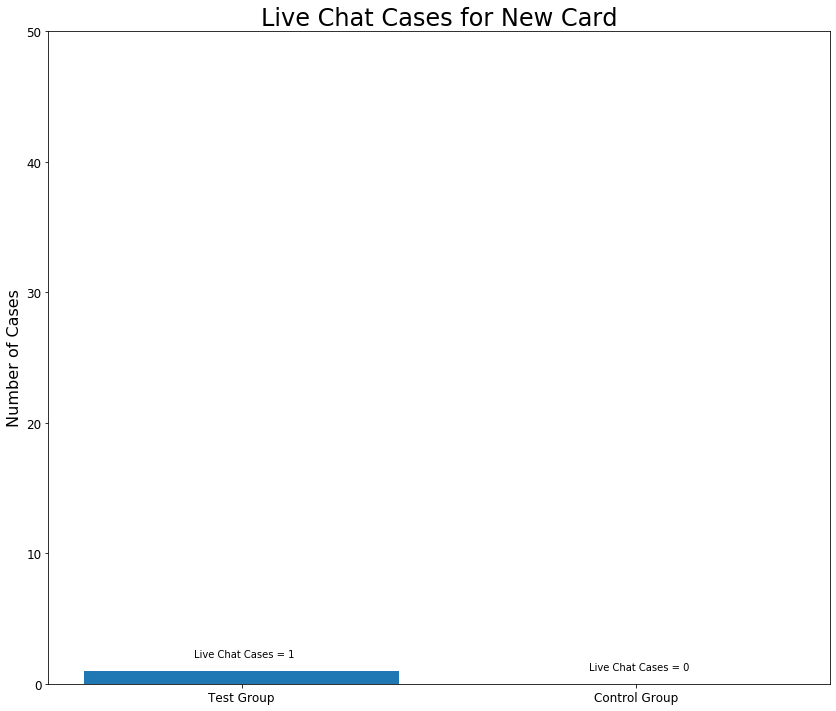

In [15]:
fig, ax = plt.subplots(figsize=(14,12))

x = [0,1]
y = [sum(contact_df[contact_df.test_group == 'TEST'].chat_new_card),sum(contact_df[contact_df.test_group == 'CONTROL'].chat_new_card)]

labels = ['Test Group','Control Group']

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0,50)

i = 0 #index for the first value we want

for label in labels:
    labels[i]
    ax.annotate('Live Chat Cases = {}'.format(y[i]), # first argument is the text you want to show on the figure
                xy=(x[i],y[i]),
                xytext=(x[i]-0.12,y[i]+1)
               )
    i = i + 1
plt.title('Live Chat Cases for New Card', fontsize = 24)
plt.ylabel('Number of Cases', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
bar_plot = plt.bar(x,y)

[Text(0, 0, 'Test Group'), Text(0, 0, 'Control Group')]

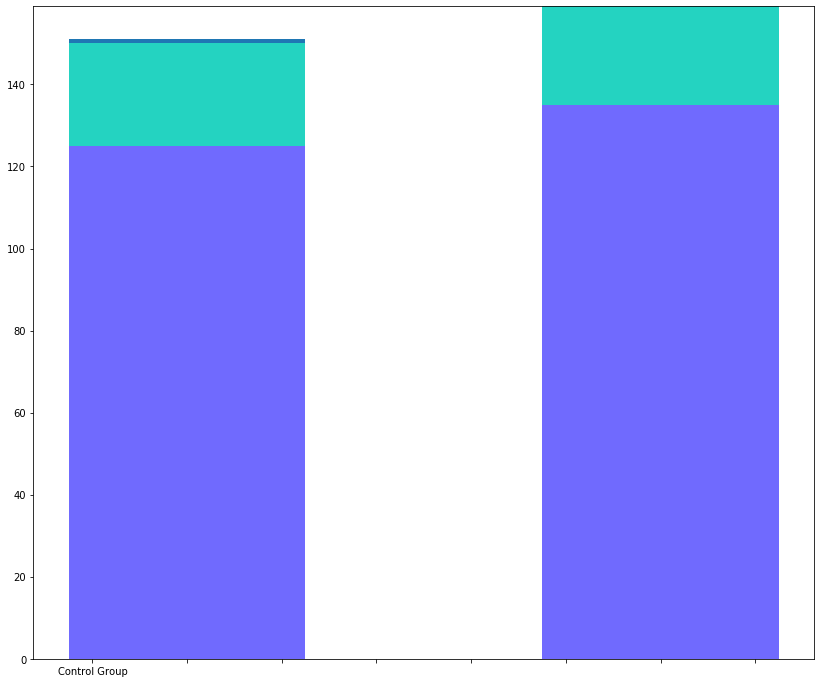

In [16]:
fig, ax = plt.subplots(figsize=(14,12))

N = 2
y1 = ([sum(contact_df[contact_df.test_group == 'TEST'].messages_new_card),sum(contact_df[contact_df.test_group == 'CONTROL'].messages_new_card)])
y2 = ([sum(contact_df[contact_df.test_group == 'TEST'].phone_new_card),sum(contact_df[contact_df.test_group == 'CONTROL'].phone_new_card)])
y3 = ([sum(contact_df[contact_df.test_group == 'TEST'].chat_new_card),sum(contact_df[contact_df.test_group == 'CONTROL'].chat_new_card)])
ind = np.arange(N)

width = 0.5

p1 = plt.bar(ind, y1, width, color = '#706AFE')
p2 = plt.bar(ind, y2, width, bottom = y1, color = '#24D3C1')
p3 = plt.bar(ind, y3, width, bottom = [y1[0]+y2[0],y1[1]+y2[1]])


labels = ['Test Group','Control Group']

ax.set_xticklabels(labels)

# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.set_ylim(0,400)

# # i = 0 #index for the first value we want

# # for label in labels:
# #     labels[i]
# #     ax.annotate('Live Chat Cases = {}'.format(y[i]), # first argument is the text you want to show on the figure
# #                 xy=(x[i],y[i]),
# #                 xytext=(x[i]-0.12,y[i]+1)
# #                )
# #     i = i + 1
# plt.title('Total Cases for New Card', fontsize = 24)
# plt.ylabel('Number of Cases', fontsize = 16)
# plt.xticks(fontsize = 12)
# plt.yticks(fontsize = 12)
# bar_plot = plt.bar(x,y1,color = '#706AFE')

In [17]:
N = 3
ind = np.arange(N)
print(ind)

[0 1 2]


In [18]:
N = 2
y1 = ([sum(contact_df[contact_df.test_group == 'TEST'].messages_new_card),sum(contact_df[contact_df.test_group == 'CONTROL'].messages_new_card)])
y2 = ([sum(contact_df[contact_df.test_group == 'TEST'].phone_new_card),sum(contact_df[contact_df.test_group == 'CONTROL'].phone_new_card)])
y3 = ([sum(contact_df[contact_df.test_group == 'TEST'].chat_new_card),sum(contact_df[contact_df.test_group == 'CONTROL'].chat_new_card)])
ind = np.arange(N)

# width = 0.5

# p1 = plt.bar(ind, y1, width, color = '#706AFE')
# p2 = plt.bar(ind, y2, width, bottom = y1, color = '#24D3C1')
# p3 = plt.bar(ind, y3, width, bottom = y2)
print(y1)
print(y2)


print(y1[0]+y2[0])

[125, 135]
[25, 24]
150


#### T-Test for Contact Across All Clients (12/19-12/23)

In [19]:
stats_messages = stats.ttest_ind(contact_df[contact_df.test_group == 'TEST'].num_messages, 
                                          contact_df[contact_df.test_group == 'CONTROL'].num_messages)

print("Total Chats - pvalue = {}".format(stats_messages.pvalue))
print("Mean for Test Group Chats = {}".format(contact_df[contact_df.test_group == 'TEST'].num_messages.mean()))
print("Mean for Control Group Chats = {}".format(contact_df[contact_df.test_group == 'CONTROL'].num_messages.mean()))

Total Chats - pvalue = 0.41532514743286164
Mean for Test Group Chats = 0.008190247754994589
Mean for Control Group Chats = 0.00869336143308746


In [20]:
stats_messages_new_card = stats.ttest_ind(contact_df[contact_df.test_group == 'TEST'].messages_new_card, 
                                          contact_df[contact_df.test_group == 'CONTROL'].messages_new_card)

print("Messages for New Card - pvalue = {}".format(stats_messages_new_card.pvalue))
print("Mean for Test Group Chats New Card = {}".format(contact_df[contact_df.test_group == 'TEST'].messages_new_card.mean()))
print("Mean for Control Group Chats New Card = {}".format(contact_df[contact_df.test_group == 'CONTROL'].messages_new_card.mean()))

Messages for New Card - pvalue = 0.6172836850694641
Mean for Test Group Chats New Card = 0.0018281803024541492
Mean for Control Group Chats New Card = 0.001975763962065332


In [93]:
stats_calls = stats.ttest_ind(contact_df[contact_df.test_group == 'TEST'].num_calls, 
                contact_df[contact_df.test_group == 'CONTROL'].num_calls)

print("Total Calls - pvalue = {}".format(stats_calls.pvalue))
print("Mean for Test Group Calls = {}".format(contact_df[contact_df.test_group == 'TEST'].num_calls.mean()))
print("Mean for Control Group Calls = {}".format(contact_df[contact_df.test_group == 'CONTROL'].num_calls.mean()))

Total Calls - pvalue = 0.8466656177570646
Mean for Test Group Calls = 0.0014508313263499985
Mean for Control Group Calls = 0.0014961579245529684


In [95]:
stats_calls_new_card = stats.ttest_ind(contact_df[contact_df.test_group == 'TEST'].phone_new_card, 
                contact_df[contact_df.test_group == 'CONTROL'].phone_new_card)

print("Calls New Card - pvalue = {}".format(stats_calls_new_card.pvalue))
print("Mean for Test Group Calls New Card = {}".format(contact_df[contact_df.test_group == 'TEST'].phone_new_card.mean()))
print("Mean for Control Group Calls New Card = {}".format(contact_df[contact_df.test_group == 'CONTROL'].phone_new_card.mean()))

Calls New Card - pvalue = 0.7482396103002107
Mean for Test Group Calls New Card = 0.00027565795200649974
Mean for Control Group Calls New Card = 0.0002469386865767035
